# Pandas Data Analysis Practice

## Importing Library and Reading CSV File

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

countries = pd.read_csv("countries_health2.csv", skipfooter = 2)     # it should be countries_health.csv
print(countries)

           location      continent  population  life_expectancy  \
0       Afghanistan           Asia  38928341.0            64.83   
1           Albania         Europe   2877800.0            78.57   
2           Algeria         Africa  43851043.0            76.88   
3           Andorra         Europe     77265.0            83.73   
4            Angola         Africa  32866268.0            61.15   
..              ...            ...         ...              ...   
203         Vatican         Europe       809.0            75.12   
204       Venezuela  South America  28435943.0            72.06   
205         Vietnam           Asia  97338583.0            75.40   
206  Western Sahara         Africa    597330.0            70.26   
207           Yemen           Asia  29825968.0            66.12   

     hospital_beds_per_thousand  gdp_per_capita  
0                          0.50        1803.987  
1                          2.89       11803.431  
2                          1.90       13913.8

C:\Users\ACER\AppData\Local\Temp\ipykernel_9800\3468911788.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  countries = pd.read_csv("countries_health2.csv", skipfooter = 2)     # it should be countries_health.csv


## Q1: How many countries does the dataframe contain?

In [31]:
num_countries = countries["location"].count()

print('There are {} countries in the dataset'.format(num_countries))

There are 208 countries in the dataset


## Q2: Retrieve a list of continents from the dataframe?

In [32]:
continents = countries["continent"].unique()

print(continents)

['Asia' 'Europe' 'Africa' 'North America' 'South America' 'Oceania']


## Q3: What is the total population of all the countries listed in this dataset?

In [33]:
total_population = countries["population"].sum()

print('The total population is {}.'.format(int(total_population)))

The total population is 7724733212.


### Q: (Optional) What is the overall life expectancy across in the world?
Hint: You'll need to take a weighted average of life expectancy using populations as weights.

In [34]:
total_expectancies = countries["life_expectancy"].mean()

# print(countries["life_expectancy"].sum())
print(total_expectancies)

73.63560975609757


## Q4: Create a dataframe containing 10 countries with the highest population
Hint: Chain the sort_values and head methods.

          location      continent    population  life_expectancy  \
41           China           Asia  1.439324e+09            76.91   
90           India           Asia  1.380004e+09            69.66   
199  United States  North America  3.310026e+08            78.86   
91       Indonesia           Asia  2.735236e+08            71.72   
145       Pakistan           Asia  2.208923e+08            67.27   
27          Brazil  South America  2.125594e+08            75.88   
141        Nigeria         Africa  2.061396e+08            54.69   
15      Bangladesh           Asia  1.646894e+08            72.59   
157         Russia         Europe  1.459345e+08            72.58   
125         Mexico  North America  1.289328e+08            75.05   

     hospital_beds_per_thousand  gdp_per_capita  
41                         4.34       15308.712  
90                         0.53        6426.674  
199                        2.77       54225.446  
91                         1.04       11188.744  
1

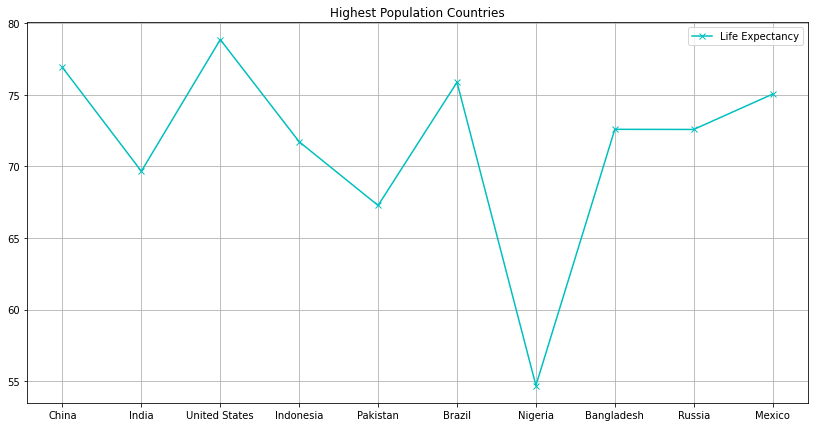

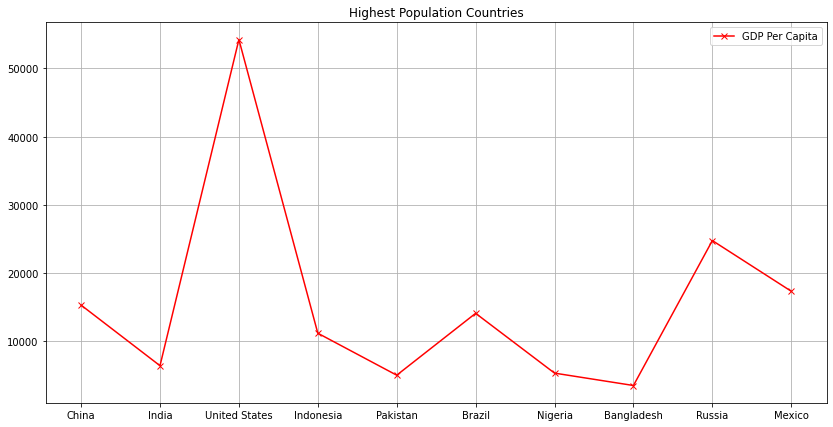

In [35]:
most_populous_df = countries.sort_values("population", ascending = False).head(10)

print(most_populous_df)

# Plotting the data
fig1, ax = plt.subplots(figsize=(14,7))
ax.plot(most_populous_df["location"], most_populous_df["life_expectancy"], "x-c", label="Life Expectancy")
plt.grid(True)
plt.title("Highest Population Countries")
ax.legend()
fig2, ax = plt.subplots(figsize=(14,7))
ax.plot(most_populous_df["location"], most_populous_df["gdp_per_capita"], "x-r", label="GDP Per Capita")
plt.grid(True)
plt.title("Highest Population Countries")
ax.legend()

plt.show()

## Q5: Add a new column in `countries_df` to record the overall GDP per country (product of population & per capita GDP)

In [36]:
countries["gdp"] = countries["population"] * countries["gdp_per_capita"]

print(countries)

           location      continent  population  life_expectancy  \
0       Afghanistan           Asia  38928341.0            64.83   
1           Albania         Europe   2877800.0            78.57   
2           Algeria         Africa  43851043.0            76.88   
3           Andorra         Europe     77265.0            83.73   
4            Angola         Africa  32866268.0            61.15   
..              ...            ...         ...              ...   
203         Vatican         Europe       809.0            75.12   
204       Venezuela  South America  28435943.0            72.06   
205         Vietnam           Asia  97338583.0            75.40   
206  Western Sahara         Africa    597330.0            70.26   
207           Yemen           Asia  29825968.0            66.12   

     hospital_beds_per_thousand  gdp_per_capita           gdp  
0                          0.50        1803.987  7.022622e+10  
1                          2.89       11803.431  3.396791e+10  
2  

### Q: (Optional) Create a dataframe containing 10 countries with the lowest GDP per capita, among the counties with population greater than 100 million.

In [37]:
lowest_GDP_df = countries[countries["population"]>100_000_000].sort_values("gdp_per_capita", ascending=False).head(10)

print(lowest_GDP_df)

          location      continent    population  life_expectancy  \
199  United States  North America  3.310026e+08            78.86   
99           Japan           Asia  1.264765e+08            84.63   
157         Russia         Europe  1.459345e+08            72.58   
125         Mexico  North America  1.289328e+08            75.05   
41           China           Asia  1.439324e+09            76.91   
27          Brazil  South America  2.125594e+08            75.88   
91       Indonesia           Asia  2.735236e+08            71.72   
58           Egypt         Africa  1.023344e+08            71.99   
151    Philippines           Asia  1.095811e+08            71.23   
90           India           Asia  1.380004e+09            69.66   

     hospital_beds_per_thousand  gdp_per_capita           gdp  
199                        2.77       54225.446  1.794877e+13  
99                        13.05       39002.223  4.932863e+12  
157                        8.05       24765.954  3.614206e+

## Q6: Create a data frame that counts the number countries in each continent?
Hint: Use groupby, select the location column and aggregate using count.

In [38]:
print(countries.groupby("continent")["location"].count())

continent
Africa           53
Asia             47
Europe           51
North America    36
Oceania           8
South America    13
Name: location, dtype: int64


## Q7: Create a data frame showing the total population of each continent.
Hint: Use groupby, select the population column and aggregate using sum.

continent
Africa           1.306177e+09
Asia             4.607388e+09
Europe           7.485062e+08
North America    5.912425e+08
Oceania          4.095832e+07
South America    4.304611e+08
Name: population, dtype: float64


Text(0.5, 1.0, 'Total Population of Each Continent')

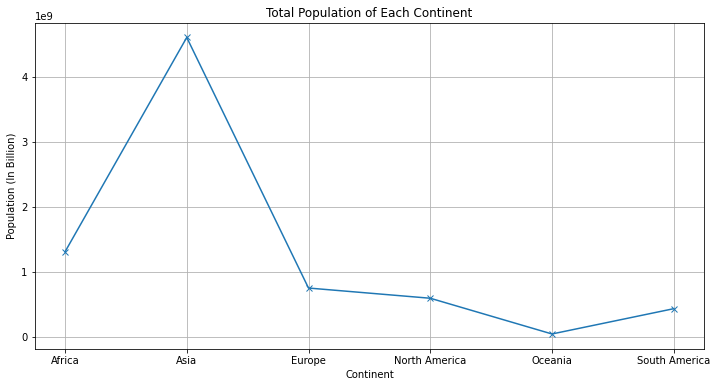

In [88]:
cont = countries["continent"].sort_values().unique()
cont_population = countries.groupby("continent")["population"].sum()
print(cont_population)

# Plotting the data
plt.figure(figsize =(12,6))
plt.plot(cont, cont_population, 'x-')
plt.xlabel("Continent")
plt.ylabel("Population (In Billion)")
plt.grid(True)
plt.title("Total Population of Each Continent")


World Covid Cases

In [40]:
world_case = pd.read_csv("world_covid_case.csv")

print(world_case)

           location  total_cases  total_deaths  total_tests
0       Afghanistan      38243.0        1409.0          NaN
1           Albania       9728.0         296.0          NaN
2           Algeria      45158.0        1525.0          NaN
3           Andorra       1199.0          53.0          NaN
4            Angola       2729.0         109.0          NaN
..              ...          ...           ...          ...
207  Western Sahara        766.0           1.0          NaN
208           World   26059065.0      863535.0          NaN
209           Yemen       1976.0         571.0          NaN
210          Zambia      12415.0         292.0          NaN
211        Zimbabwe       6638.0         206.0      97272.0

[212 rows x 4 columns]


## Q8: Count the number of countries for which the total_tests data is missing.
Hint: Use the .isna method.

In [41]:
total_tests_missing = world_case["total_tests"].isna().sum()

print("The data for total tests is missing for {} countries.".format(int(total_tests_missing)))

The data for total tests is missing for 122 countries.


## Q9: Merge countries_df with covid_data_df on the location column.
Hint: Use the .merge method on countries_df.

In [42]:
combined_df = countries.merge(world_case, on = "location")

print(combined_df)

           location      continent  population  life_expectancy  \
0       Afghanistan           Asia  38928341.0            64.83   
1           Albania         Europe   2877800.0            78.57   
2           Algeria         Africa  43851043.0            76.88   
3           Andorra         Europe     77265.0            83.73   
4            Angola         Africa  32866268.0            61.15   
..              ...            ...         ...              ...   
203         Vatican         Europe       809.0            75.12   
204       Venezuela  South America  28435943.0            72.06   
205         Vietnam           Asia  97338583.0            75.40   
206  Western Sahara         Africa    597330.0            70.26   
207           Yemen           Asia  29825968.0            66.12   

     hospital_beds_per_thousand  gdp_per_capita           gdp  total_cases  \
0                          0.50        1803.987  7.022622e+10      38243.0   
1                          2.89       1

## Q10: Add columns `tests_per_million`, `cases_per_million` and `deaths_per_million` into `combined_df`


In [43]:
combined_df["tests_per_million"] = combined_df["total_tests"] * 1e6 / combined_df["population"]
combined_df["cases_per_million"] = combined_df["total_cases"] * 1e6 / combined_df["population"]
combined_df["deaths_per_million"] = combined_df["total_deaths"] * 1e6 / combined_df["population"]

print(combined_df)

           location      continent  population  life_expectancy  \
0       Afghanistan           Asia  38928341.0            64.83   
1           Albania         Europe   2877800.0            78.57   
2           Algeria         Africa  43851043.0            76.88   
3           Andorra         Europe     77265.0            83.73   
4            Angola         Africa  32866268.0            61.15   
..              ...            ...         ...              ...   
203         Vatican         Europe       809.0            75.12   
204       Venezuela  South America  28435943.0            72.06   
205         Vietnam           Asia  97338583.0            75.40   
206  Western Sahara         Africa    597330.0            70.26   
207           Yemen           Asia  29825968.0            66.12   

     hospital_beds_per_thousand  gdp_per_capita           gdp  total_cases  \
0                          0.50        1803.987  7.022622e+10      38243.0   
1                          2.89       1

## Q11: Create a dataframe with 10 countires that have highest number of tests per million people

                 location      continent   population  life_expectancy  \
197  United Arab Emirates           Asia    9890400.0            77.97   
14                Bahrain           Asia    1701583.0            77.29   
115            Luxembourg         Europe     625976.0            82.25   
122                 Malta         Europe     441539.0            82.53   
53                Denmark         Europe    5792203.0            80.90   
96                 Israel           Asia    8655541.0            82.97   
89                Iceland         Europe     341250.0            82.99   
157                Russia         Europe  145934460.0            72.58   
199         United States  North America  331002647.0            78.86   
10              Australia        Oceania   25499881.0            83.44   

     hospital_beds_per_thousand  gdp_per_capita           gdp  total_cases  \
197                       1.200       67293.483  6.655595e+11      71540.0   
14                        2.0

Text(0.5, 1.0, 'Highest Number of Tests Countries')

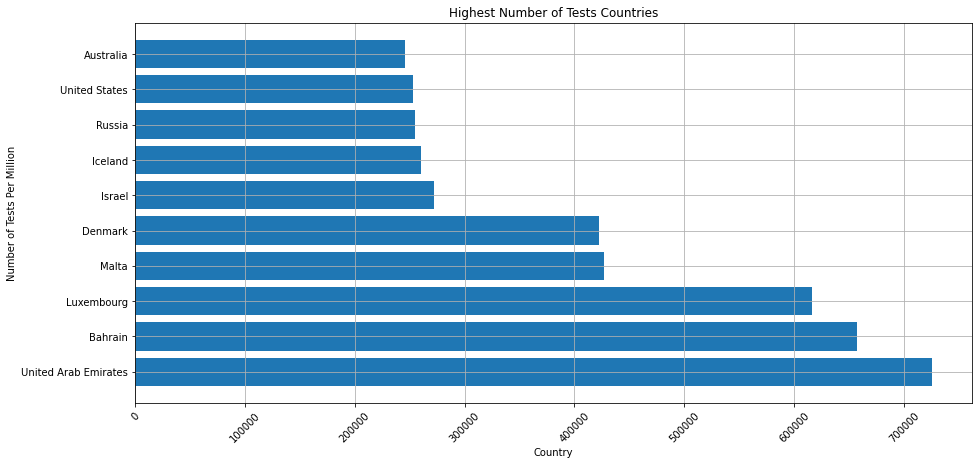

In [91]:
highest_test_df = combined_df.sort_values("tests_per_million", ascending = False).head(10)

print(highest_test_df)

# Plotting the data
plt.figure(figsize =(15,7))
plt.barh(highest_test_df["location"], highest_test_df["tests_per_million"])
plt.xlabel("Country")
plt.ylabel("Number of Tests Per Million")
plt.grid(True)
plt.xticks(rotation=45)
plt.title("Highest Number of Tests Countries")

## Q12: Create a dataframe with 10 countires that have highest number of positive cases per million people

          location      continent   population  life_expectancy  \
155          Qatar           Asia    2881060.0            80.23   
14         Bahrain           Asia    1701583.0            77.29   
147         Panama  North America    4314768.0            78.51   
40           Chile  South America   19116209.0            80.18   
162     San Marino         Europe      33938.0            84.97   
9            Aruba  North America     106766.0            76.29   
105         Kuwait           Asia    4270563.0            75.49   
150           Peru  South America   32971846.0            76.74   
27          Brazil  South America  212559409.0            75.88   
199  United States  North America  331002647.0            78.86   

     hospital_beds_per_thousand  gdp_per_capita           gdp  total_cases  \
155                        1.20      116935.600  3.368985e+11     119206.0   
14                         2.00       43290.705  7.366273e+10      52440.0   
147                        2

Text(0.5, 1.0, 'Highest Number of Cases Countries')

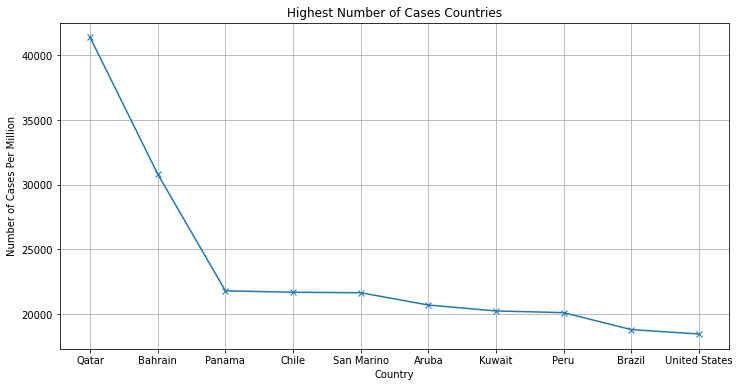

In [53]:
highest_cases_df = combined_df.sort_values("cases_per_million", ascending = False).head(10)

print(highest_cases_df)

# Plotting the data
plt.figure(figsize =(12,6))
plt.plot(highest_cases_df["location"], highest_cases_df["cases_per_million"], 'x-')
plt.xlabel("Country")
plt.ylabel("Number of Cases Per Million")
plt.grid(True)
plt.title("Highest Number of Cases Countries")

## Q13: Create a dataframe with 10 countires that have highest number of deaths cases per million people?

           location      continent   population  life_expectancy  \
162      San Marino         Europe      33938.0            84.97   
150            Peru  South America   32971846.0            76.74   
18          Belgium         Europe   11589616.0            81.63   
3           Andorra         Europe      77265.0            83.73   
177           Spain         Europe   46754783.0            83.56   
198  United Kingdom         Europe   67886004.0            81.32   
40            Chile  South America   19116209.0            80.18   
97            Italy         Europe   60461828.0            83.51   
27           Brazil  South America  212559409.0            75.88   
182          Sweden         Europe   10099270.0            82.80   

     hospital_beds_per_thousand  gdp_per_capita           gdp  total_cases  \
162                        3.80       56861.470  1.929765e+09        735.0   
150                        1.60       12236.706  4.034668e+11     663437.0   
18               

Text(0.5, 1.0, 'Highest Number of Deaths Countries')

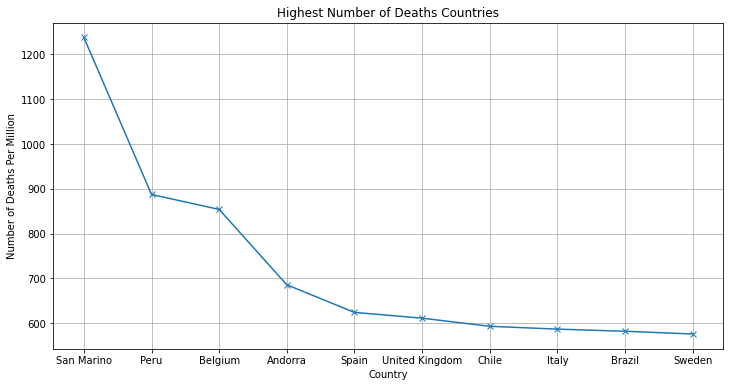

In [54]:
highest_deaths_df = combined_df.sort_values("deaths_per_million", ascending = False).head(10)

print(highest_deaths_df)

# Plotting the data
plt.figure(figsize =(12,6))
plt.plot(highest_deaths_df["location"], highest_deaths_df["deaths_per_million"], 'x-')
plt.xlabel("Country")
plt.ylabel("Number of Deaths Per Million")
plt.grid(True)
plt.title("Highest Number of Deaths Countries")

## (Optional) Q: Count number of countries that feature in both the lists of "highest number of tests per million" and "highest number of cases per million".

In [47]:
cases_countries = combined_df.groupby("location")[["tests_per_million","cases_per_million"]].sum()

print(cases_countries.sort_values(["tests_per_million","cases_per_million"],ascending=False))

                      tests_per_million  cases_per_million
location                                                  
United Arab Emirates      725696.635121        7233.276713
Bahrain                   657527.137965       30818.361490
Luxembourg                616349.508607       12665.022301
Malta                     427004.183096        4373.339614
Denmark                   422621.755488        2968.645954
...                                 ...                ...
Burundi                        0.000000          37.676247
Timor                          0.000000          20.478717
Cambodia                       0.000000          16.388568
Tanzania                       0.000000           8.521080
Laos                           0.000000           3.023824

[208 rows x 2 columns]


## (Optional) Q: Count number of countries that feature in both the lists "20 countries with lowest GDP per capita" and "20 countries with the lowest number of hospital beds per thousand population". Only consider countries with a population higher than 10 million while creating the list.

                         location      continent   population  \
32                        Burundi         Africa   11890781.0   
52   Democratic Republic of Congo         Africa   89561404.0   
140                         Niger         Africa   24206636.0   
118                        Malawi         Africa   19129955.0   
132                    Mozambique         Africa   31255435.0   
117                    Madagascar         Africa   27691019.0   
207                         Yemen           Asia   29825968.0   
176                   South Sudan         Africa   11193729.0   
85                          Haiti  North America   11402533.0   
195                        Uganda         Africa   45741000.0   
31                   Burkina Faso         Africa   20903278.0   
63                       Ethiopia         Africa  114963583.0   
39                           Chad         Africa   16425859.0   
0                     Afghanistan           Asia   38928341.0   
158                      

Text(0.5, 1.0, 'Countries with Lowest GDP Per Capita')

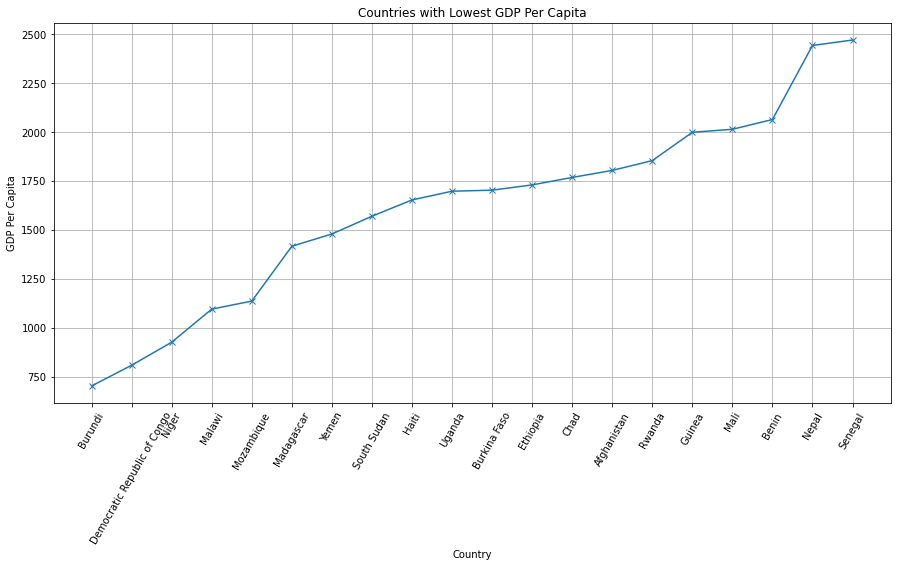

In [85]:
# gdp_hospital_beds = combined_df.groupby("location")["gdp_per_capita", "hospital_beds_per_thousand", "population"].sum()
hospital_beds = combined_df[combined_df["population"]>10_000_000].sort_values(["gdp_per_capita", "hospital_beds_per_thousand"], ascending = True).head(20)

# print(gdp_hospital_beds[gdp_hospital_beds["population"]>10_000_000])
print(hospital_beds)

# Plotting this data
plt.figure(figsize =(15,7))
plt.plot(hospital_beds["location"], hospital_beds["gdp_per_capita"], 'x-')
plt.xlabel("Country")
plt.ylabel("GDP Per Capita")
plt.grid(True)
plt.xticks(rotation=60)
plt.title("Countries with Lowest GDP Per Capita")